In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dia = pd.read_csv('pima-indians-diabetes.csv')

In [3]:
dia.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [4]:
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
6        767 non-null int64
148      767 non-null int64
72       767 non-null int64
35       767 non-null int64
0        767 non-null int64
33.6     767 non-null float64
0.627    767 non-null float64
50       767 non-null int64
1        767 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.0 KB


In [5]:
dia.columns = ["pregnancies", "glucose", "blood_pressure", "skin_thickness","insulin","bmi","Diabetes_Pedigree_Function","age","outcome"]

In [7]:
dia.glucose.replace(0,np.nan,inplace = True)
dia.insulin.replace(0,np.nan,inplace = True)
dia.blood_pressure.replace(0,np.nan,inplace = True)
dia.bmi.replace(0,np.nan,inplace = True)
dia.skin_thickness.replace(0,np.nan,inplace = True)
dia.age.replace(0,np.nan,inplace = True)
dia.Diabetes_Pedigree_Function.replace(0,np.nan,inplace = True)

In [9]:
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
pregnancies                   767 non-null int64
glucose                       762 non-null float64
blood_pressure                732 non-null float64
skin_thickness                540 non-null float64
insulin                       394 non-null float64
bmi                           756 non-null float64
Diabetes_Pedigree_Function    767 non-null float64
age                           767 non-null int64
outcome                       767 non-null int64
dtypes: float64(6), int64(3)
memory usage: 54.0 KB


In [10]:
#insulin and skin_thickness columns are beyond saving,so we drop it
dia.drop('insulin',axis = 1,inplace= True)

In [12]:
dia.drop('skin_thickness',axis = 1,inplace = True)

In [13]:
dia.blood_pressure.replace(np.nan,np.mean(dia['blood_pressure']),inplace = True)
dia.bmi.replace(np.nan,np.mean(dia['bmi']),inplace = True)

In [31]:
dia.glucose.replace(np.nan,np.mean(dia['glucose']),inplace = True)

In [14]:
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 7 columns):
pregnancies                   767 non-null int64
glucose                       762 non-null float64
blood_pressure                767 non-null float64
bmi                           767 non-null float64
Diabetes_Pedigree_Function    767 non-null float64
age                           767 non-null int64
outcome                       767 non-null int64
dtypes: float64(4), int64(3)
memory usage: 42.0 KB


In [15]:
dia.head()

,pregnancies,glucose,blood_pressure,bmi,Diabetes_Pedigree_Function,age,outcome
0,1,85.0,66.0,26.6,0.351,31,0
1,8,183.0,64.0,23.3,0.672,32,1
2,1,89.0,66.0,28.1,0.167,21,0
3,0,137.0,40.0,43.1,2.288,33,1
4,5,116.0,74.0,25.6,0.201,30,0


In [16]:
dia.describe()

,pregnancies,glucose,blood_pressure,bmi,Diabetes_Pedigree_Function,age,outcome
count,767.000000,762.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,121.652231,72.405738,32.455952,0.471674,33.219035,0.348110
std,3.370877,30.540786,12.104231,6.879514,0.331497,11.752296,0.476682
min,0.000000,44.000000,24.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,27.500000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.405738,32.400000,0.371000,29.000000,0.000000
75%,6.000000,140.750000,80.000000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,67.100000,2.420000,81.000000,1.000000


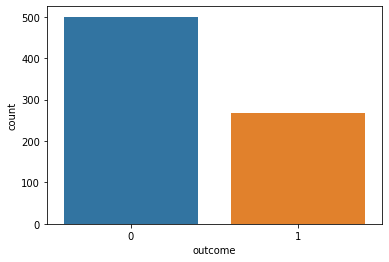

In [17]:
sns.countplot('outcome',data = dia)
#looks like more than 250 patients have been tested positive for diabetes

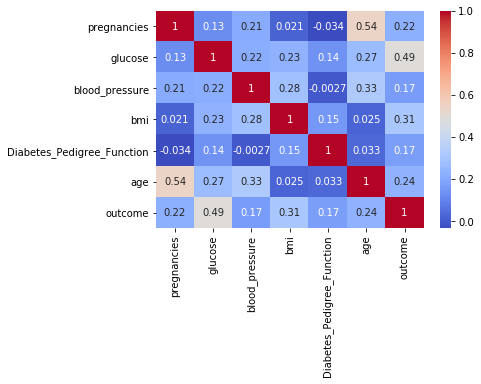

In [18]:
dcorr = dia.corr()
sns.heatmap(dcorr,cmap = 'coolwarm',annot = True)
#we can interpret that insulin and glucose have high correlation 
#glucose and outcome also has high correlation
#skin_thickness and insulin also has high correlation
#age and pregnancies have high correlation
#bmi and skin_thickness have high correlation

C:\Users\dell\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\dell\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


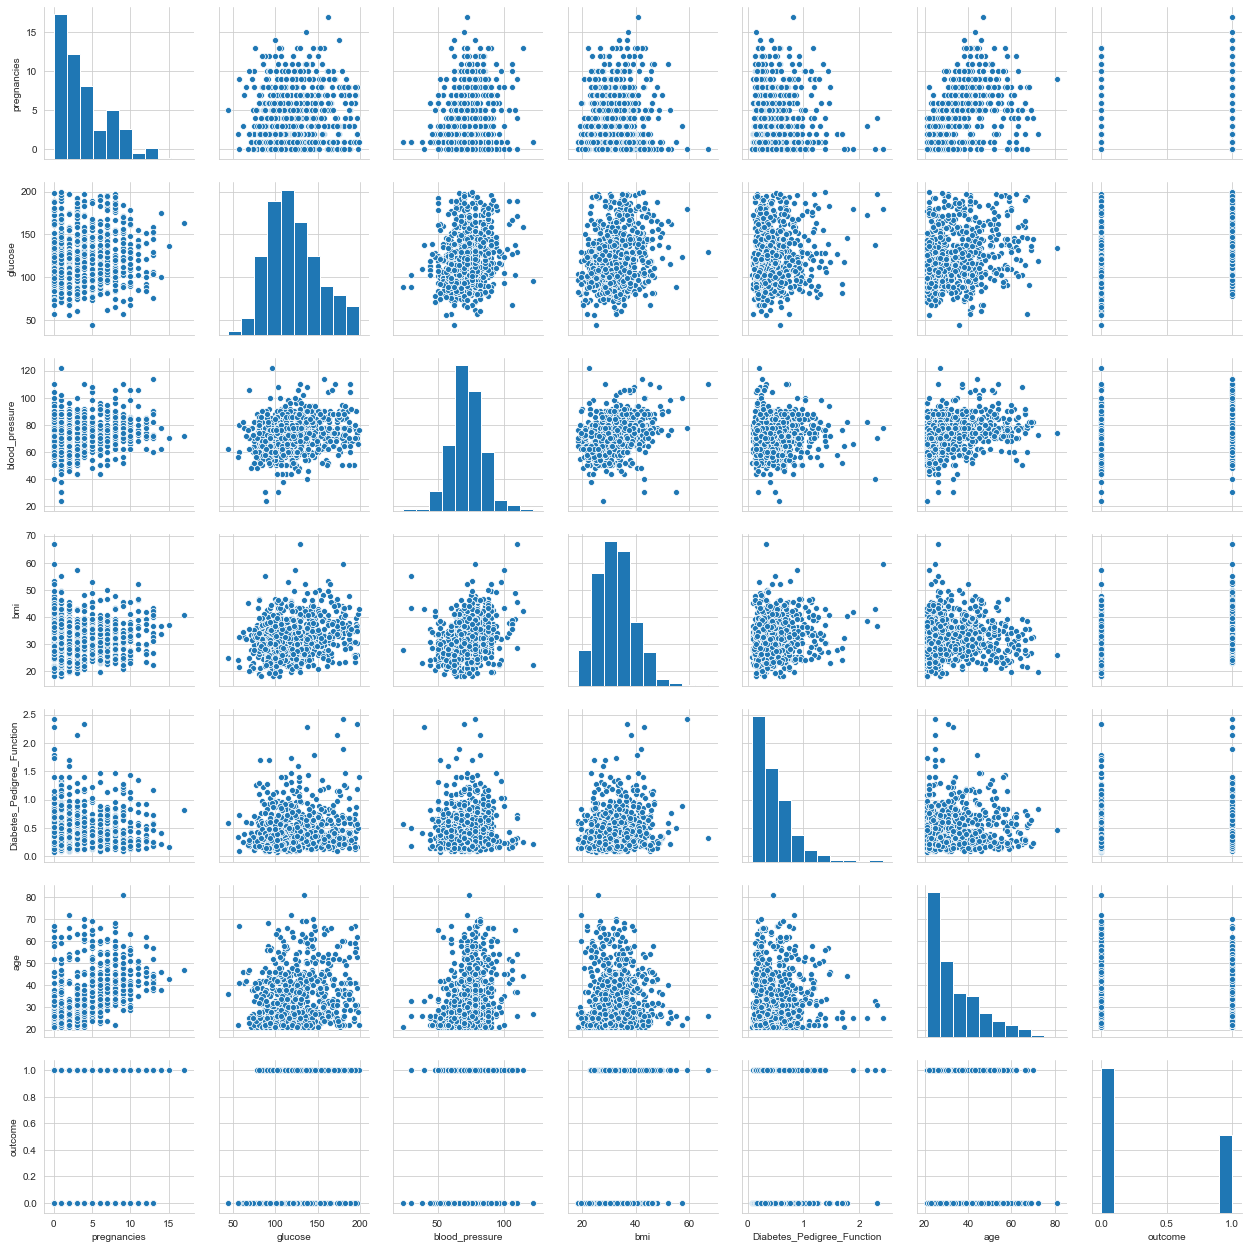

In [19]:
sns.set_style('whitegrid')
sns.pairplot(data = dia)

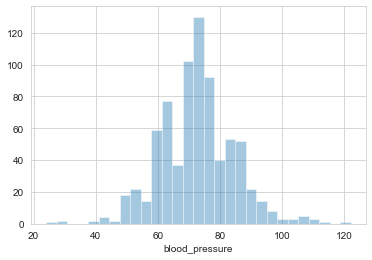

In [20]:
sns.distplot(dia['blood_pressure'],kde = False)
#Most of the people have optimal blood pressure in the dataset

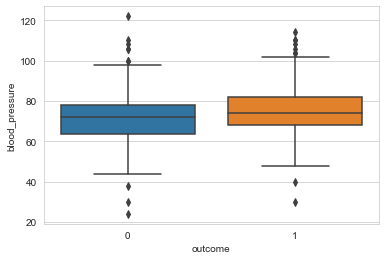

In [21]:
sns.boxplot(x = 'outcome',y = 'blood_pressure',data = dia)
#Average blood pressure of the +ve patients is high compared to -ve patients

Text(0, 0.5, 'age')

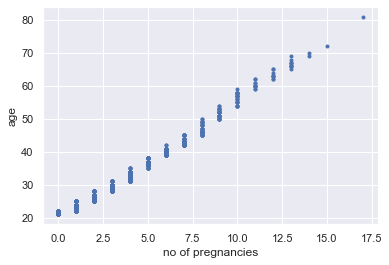

In [23]:
sns.set()
x = np.sort(dia['pregnancies'])
y = np.sort(dia['age'])
plt.plot(x,y,marker = '.',linestyle = 'none')
plt.xlabel('no of pregnancies')
plt.ylabel('age')
#we can see pregnancies increases with age

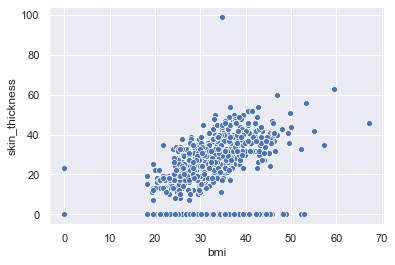

In [14]:
sns.scatterplot(x = 'bmi',y = 'skin_thickness',data = dia)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [33]:
#train test split
#for X we can select all except outcome as they are somehow related to each other and influence output
#for y we can select outcome
X = dia.drop('outcome',axis = 1)
y = dia['outcome']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [34]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536 entries, 210 to 480
Data columns (total 6 columns):
pregnancies                   536 non-null int64
glucose                       536 non-null float64
blood_pressure                536 non-null float64
bmi                           536 non-null float64
Diabetes_Pedigree_Function    536 non-null float64
age                           536 non-null int64
dtypes: float64(4), int64(2)
memory usage: 29.3 KB


In [35]:
y_train.head()

210    0
563    0
184    1
554    0
166    0
Name: outcome, dtype: int64

In [36]:
#Logistic Regression
logmodel = LogisticRegression()

In [37]:
#training
logmodel.fit(X_train,y_train)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
#predictions
predictions = logmodel.predict(X_test)

In [39]:
#classification report and confusion matrix
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
#accuracy of the model is not satisfied with LogisticRegression

[[128  22]
 [ 37  44]]


              precision    recall  f1-score   support

           0       0.78      0.85      0.81       150
           1       0.67      0.54      0.60        81

    accuracy                           0.74       231
   macro avg       0.72      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231



In [40]:
#support Vector machines
from sklearn.svm import SVC

In [41]:
model = SVC(gamma = 'auto')
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(classification_report(y_test,predictions))
#it is predicting '1' for every record,so we perform Grid Search

              precision    recall  f1-score   support

           0       0.65      1.00      0.79       150
           1       0.00      0.00      0.00        81

    accuracy                           0.65       231
   macro avg       0.32      0.50      0.39       231
weighted avg       0.42      0.65      0.51       231



C:\Users\dell\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
grid_param = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001]}

In [44]:
grid = GridSearchCV(model,grid_param)
grid.fit(X_train,y_train)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [45]:
grid.best_params_

{'C': 10, 'gamma': 0.0001}

In [46]:
grid_model = SVC(C = 10,gamma = 0.0001)
grid_model.fit(X_train,y_train)
grid_predictions = grid_model.predict(X_test)

In [47]:
confusion_matrix(y_test,grid_predictions)

array([[130,  20],
       [ 36,  45]], dtype=int64)

In [48]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       150
           1       0.69      0.56      0.62        81

    accuracy                           0.76       231
   macro avg       0.74      0.71      0.72       231
weighted avg       0.75      0.76      0.75       231



In [53]:
#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[119  31]
 [ 32  49]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       150
           1       0.61      0.60      0.61        81

    accuracy                           0.73       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.73      0.73      0.73       231



In [63]:
#Best K 
error_rates = []
for i in range(1,60):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rates.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

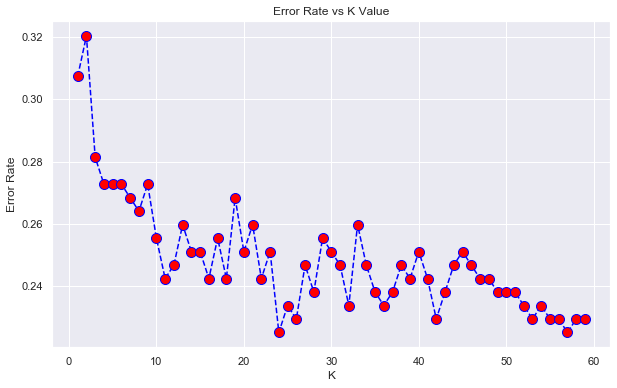

In [65]:
#Figure for Best K
plt.figure(figsize = (10,6))
plt.plot(range(1,60),error_rates,color = 'blue',linestyle = '--',marker = 'o',markerfacecolor = 'red',markersize = 10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [69]:
#With Best K
knn = KNeighborsClassifier(n_neighbors = 24)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[132  18]
 [ 34  47]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       150
           1       0.72      0.58      0.64        81

    accuracy                           0.77       231
   macro avg       0.76      0.73      0.74       231
weighted avg       0.77      0.77      0.77       231



**None of the models give satifactory accuracy**,
**All of them give Roughly 75% accuracy**